In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from neuralNetworkFromScratch import NeuralNetworkFromScratch

# 1. Import Data

In [4]:
data = fetch_california_housing()
features = pd.DataFrame(data=data.data, columns=data.feature_names)
target = pd.DataFrame(data=data.target, columns=data.target_names)

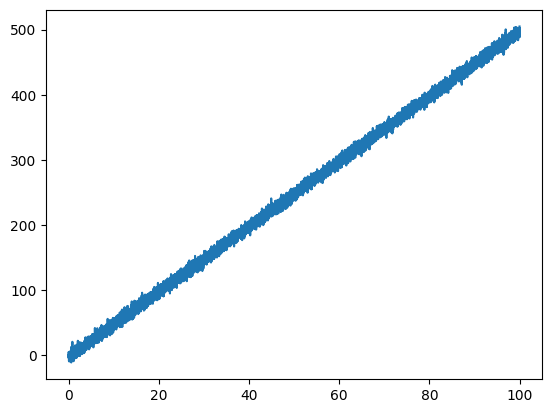

In [5]:
n_points = 10000
a=5
b=-3
alpha = 0.01

x = np.linspace(0,100,n_points)
y = a*x+b

white_noise = np.random.randn(len(x))*max(y)*alpha
y = y + white_noise

features = pd.DataFrame(data={'x':x})
target = pd.DataFrame(data={'y':y})
plt.plot(x,y)

# 2. Preprocessing

In [6]:
def min_max_scaler(series):
    normalized = (series - min(series)) / (max(series)-min(series))
    return normalized

In [7]:
for col in features.columns:
    features[col] = min_max_scaler(features[col])

In [8]:
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.33, random_state=42)

split_point = int(len(x) * 0.7)

train_x = features[:split_point]
test_x = features[split_point:]
train_y = target[:split_point]
test_y = target[split_point:]

train_x = train_x.to_numpy().T
test_x = test_x.to_numpy().T
train_y = train_y.to_numpy().T
test_y = test_y.to_numpy().T

In [9]:
model = NeuralNetworkFromScratch(layers_dims=[1, 8, 4, 3, 2, 1], cost_function='RMSE', learning_rate=0.005, num_iterations=2000, print_cost=True)

In [10]:
parameters, costs = model.fit(train_x, train_y)

Cost after iteration 0: 19915.461402791425
Cost after iteration 100: 1753469.5899656676
Cost after iteration 200: 646692.0727478537
Cost after iteration 300: 240551.40589410975
Cost after iteration 400: 91514.9114710468
Cost after iteration 500: 36824.80411985551
Cost after iteration 600: 16755.84145629211
Cost after iteration 700: 9391.378632967107
Cost after iteration 800: 6688.931397136423
Cost after iteration 900: 5697.247246146093
Cost after iteration 1000: 5333.340990258318
Cost after iteration 1100: 5199.802743285212
Cost after iteration 1200: 5150.799839058832
Cost after iteration 1300: 5132.8178400656625
Cost after iteration 1400: 5126.219204884849
Cost after iteration 1500: 5123.797784092531
Cost after iteration 1600: 5122.9092247931
Cost after iteration 1700: 5122.583161008106
Cost after iteration 1800: 5122.463509351821
Cost after iteration 1900: 5122.419602240665
Cost after iteration 1999: 5122.403584285317


In [17]:
model.predict(test_x*1e-5, test_y)

RMSE: 96692523.49335724


array([171.92649497, 171.92649497, 171.92649497, ..., 171.92649497,
       171.92649497, 171.92649497])

In [18]:
model.parameters

{'W1': array([[-1.72001504e+07],
        [-6.11756414e-01],
        [-5.28171752e-01],
        [-1.07296862e+00],
        [ 3.84827553e-01],
        [-2.30153870e+00],
        [-4.05426544e+07],
        [-7.61206901e-01]]),
 'b1': array([[-4.62302577e+07],
        [ 0.00000000e+00],
        [ 0.00000000e+00],
        [ 0.00000000e+00],
        [-9.36806672e-01],
        [ 0.00000000e+00],
        [-1.08969820e+08],
        [ 0.00000000e+00]]),
 'W2': array([[-8.72067303e+06, -8.81657418e-02,  5.16933219e-01,
         -7.28369733e-01,  1.20141300e-01, -1.35783719e-01,
         -3.07680921e+07, -3.88870287e-01],
        [ 8.87825392e+05, -3.10369820e-01,  1.49248133e-02,
          2.06056295e-01, -4.42888725e-01,  4.04720949e-01,
          3.13240722e+06,  1.77658577e-01],
        [ 3.18662034e-01, -2.41734303e-01, -4.34482559e-02,
         -3.30844456e-01, -9.46267715e-02,  1.87508973e-01,
         -2.44365679e-01, -1.40273555e-01],
        [-3.11519850e+07, -2.98825320e-01, -2.37321345

Text(0, 0.5, 'Cost Function')

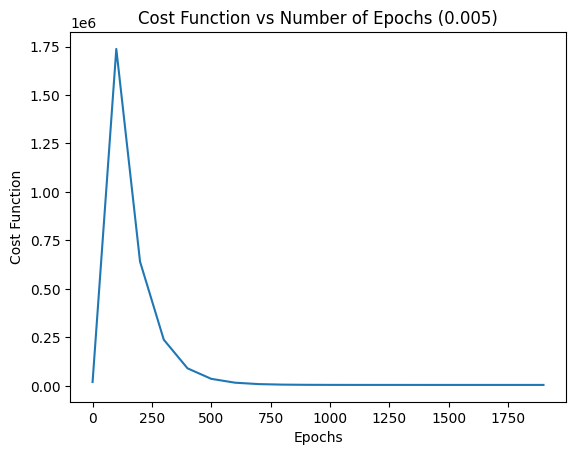

In [10]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(0, len(model.costs))*100, model.costs)
plt.title(f'Cost Function vs Number of Epochs ({model.learning_rate})')
plt.xlabel('Epochs')
plt.ylabel('Cost Function')

In [50]:
results

,actual,pred
0,348.924068,171.985482
1,349.398254,171.985482
2,350.865136,171.985482
3,352.124198,171.985482
4,347.598480,171.985482
...,...,...
2995,494.924335,171.985482
2996,501.063026,171.985482
2997,491.975811,171.985482
2998,491.803673,171.985482


<Axes: >

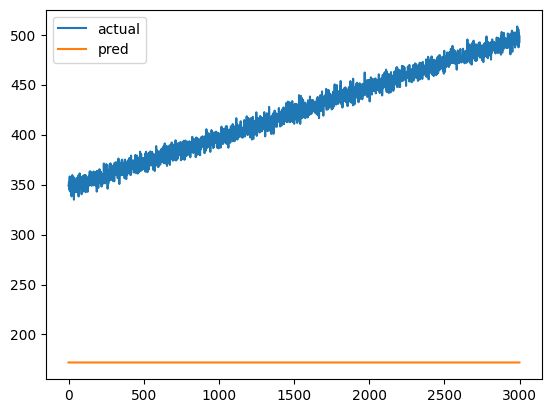

In [49]:
results = pd.DataFrame(data={'actual':test_y[0], 'pred':pred_test[0]})
results.plot(label=['actual', 'pred'])

In [87]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(test_y, pred_test)
mape

0.2856504197321246

In [103]:
features['AveRooms'].to_numpy().T.shape

(20640,)

In [105]:
type(target) == pd.core.frame.DataFrame

True